In [5]:
import requests
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import boto3
from dotenv import load_dotenv
import mlflow

pd.set_option('display.max_info_columns', 1000)
pd.set_option('display.max_columns', 50)  
pd.set_option('display.max_rows', 50)

load_dotenv()

True

In [3]:
yadisk_url = "https://disk.yandex.com/d/Io0siOESo2RAaA"

def get_direct_download_url(public_url):
    """
    –ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä—è–º–æ–π —Å—Å—ã–ª–∫–∏ –Ω–∞ —Å–∫–∞—á–∏–≤–∞–Ω–∏–µ —á–µ—Ä–µ–∑ API –Ø–Ω–¥–µ–∫—Å –î–∏—Å–∫–∞.
    """
    api_url = "https://cloud-api.yandex.net/v1/disk/public/resources/download"
    response = requests.get(api_url, params={'public_key': public_url})
    response.raise_for_status()
    return response.json()["href"]

def download_file(url, filename):
    """
    –°–∫–∞—á–∏–≤–∞–Ω–∏–µ —Ñ–∞–π–ª–∞ –ø–æ –ø—Ä—è–º–æ–π —Å—Å—ã–ª–∫–µ.
    """
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)

def extract_zip(archive_path, extract_to='.'):
    """
    –†–∞—Å–ø–∞–∫–æ–≤–∫–∞ ZIP –∞—Ä—Ö–∏–≤–∞.
    """
    with zipfile.ZipFile(archive_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

def main():
    archive_name = "archive.zip"
    
    print("–ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä—è–º–æ–π —Å—Å—ã–ª–∫–∏...")
    direct_url = get_direct_download_url(yadisk_url)

    print("–°–∫–∞—á–∏–≤–∞–Ω–∏–µ –∞—Ä—Ö–∏–≤–∞...")
    download_file(direct_url, archive_name)

    print("–†–∞—Å–ø–∞–∫–æ–≤–∫–∞ –∞—Ä—Ö–∏–≤–∞...")
    extract_zip(archive_name, extract_to='./data')

    print("–ì–æ—Ç–æ–≤–æ!")

if __name__ == "__main__":
    main()


–ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä—è–º–æ–π —Å—Å—ã–ª–∫–∏...
–°–∫–∞—á–∏–≤–∞–Ω–∏–µ –∞—Ä—Ö–∏–≤–∞...
–†–∞—Å–ø–∞–∫–æ–≤–∫–∞ –∞—Ä—Ö–∏–≤–∞...
–ì–æ—Ç–æ–≤–æ!


In [4]:
df = pd.read_csv("data/train_ver2.csv")
df.head()

/tmp/ipykernel_4922/2902728405.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/train_ver2.csv")


fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2015-01-28   1375586            N              ES    H   35  2015-01-12   
1  2015-01-28   1050611            N              ES    V   23  2012-08-10   
2  2015-01-28   1050612            N              ES    V   23  2012-08-10   
3  2015-01-28   1050613            N              ES    H   22  2012-08-10   
4  2015-01-28   1050614            N              ES    V   23  2012-08-10   

   ind_nuevo antiguedad  indrel ult_fec_cli_1t indrel_1mes tiprel_1mes  \
0        0.0          6     1.0            NaN         1.0           A   
1        0.0         35     1.0            NaN         1.0           I   
2        0.0         35     1.0            NaN         1.0           I   
3        0.0         35     1.0            NaN         1.0           I   
4        0.0         35     1.0            NaN         1.0           A   

  indresi indext conyuemp canal_entrada indfall  tipodom  cod_prov  \
0       S      N      NaN           KHL       N      1.0      29.0   
1       S      S      NaN           KHE       N      1.0      13.0   
2       S      N      NaN           KHE       N      1.0      13.0   
3       S      N      NaN           KHD       N      1.0      50.0   
4       S      N      NaN           KHE       N      1.0      50.0   

       nomprov  ind_actividad_cliente      renta            segmento  \
0       MALAGA                    1.0   87218.10   02 - PARTICULARES   
1  CIUDAD REAL                    0.0   35548.74  03 - UNIVERSITARIO   
2  CIUDAD REAL                    0.0  122179.11  03 - UNIVERSITARIO   
3     ZARAGOZA                    0.0  119775.54  03 - UNIVERSITARIO   
4     ZARAGOZA                    1.0        NaN  03 - UNIVERSITARIO   

   ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  \
0                  0                  0                 1                  0   
1                  0                  0                 1                  0   
2                  0                  0                 1                  0   
3                  0                  0                 0                  0   
4                  0                  0                 1                  0   

   ind_cno_fin_ult1  ind_ctju_fin_ult1  ind_ctma_fin_ult1  ind_ctop_fin_ult1  \
0                 0                  0                  0                  0   
1                 0                  0                  0                  0   
2                 0                  0                  0                  0   
3                 0                  0                  0                  0   
4                 0                  0                  0                  0   

   ind_ctpp_fin_ult1  ind_deco_fin_ult1  ind_deme_fin_ult1  ind_dela_fin_ult1  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  1                  0                  0   
4                  0                  0                  0                  0   

   ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_hip_fin_ult1  ind_plan_fin_ult1  \
0                  0                  0                 0                  0   
1                  0                  0                 0                  0   
2                  0                  0                 0                  0   
3                  0                  0                 0                  0   
4                  0                  0                 0                  0   

   ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  ind_valo_fin_ult1  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0    

In [5]:
display(df.iloc[:,:20].info(verbose=True, show_counts=True))
display(df.iloc[:,20:40].info(verbose=True, show_counts=True))
display(df.iloc[:,40:].info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 20 columns):
 #   Column           Non-Null Count     Dtype  
---  ------           --------------     -----  
 0   fecha_dato       13647309 non-null  object 
 1   ncodpers         13647309 non-null  int64  
 2   ind_empleado     13619575 non-null  object 
 3   pais_residencia  13619575 non-null  object 
 4   sexo             13619505 non-null  object 
 5   age              13647309 non-null  object 
 6   fecha_alta       13619575 non-null  object 
 7   ind_nuevo        13619575 non-null  float64
 8   antiguedad       13647309 non-null  object 
 9   indrel           13619575 non-null  float64
 10  ult_fec_cli_1t   24793 non-null     object 
 11  indrel_1mes      13497528 non-null  object 
 12  tiprel_1mes      13497528 non-null  object 
 13  indresi          13619575 non-null  object 
 14  indext           13619575 non-null  object 
 15  conyuemp         1808 non-null      object 
 16

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 20 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   nomprov                13553718 non-null  object 
 1   ind_actividad_cliente  13619575 non-null  float64
 2   renta                  10852934 non-null  float64
 3   segmento               13457941 non-null  object 
 4   ind_ahor_fin_ult1      13647309 non-null  int64  
 5   ind_aval_fin_ult1      13647309 non-null  int64  
 6   ind_cco_fin_ult1       13647309 non-null  int64  
 7   ind_cder_fin_ult1      13647309 non-null  int64  
 8   ind_cno_fin_ult1       13647309 non-null  int64  
 9   ind_ctju_fin_ult1      13647309 non-null  int64  
 10  ind_ctma_fin_ult1      13647309 non-null  int64  
 11  ind_ctop_fin_ult1      13647309 non-null  int64  
 12  ind_ctpp_fin_ult1      13647309 non-null  int64  
 13  ind_deco_fin_ult1      13647309 non-null  int64  
 14  

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 8 columns):
 #   Column             Non-Null Count     Dtype  
---  ------             --------------     -----  
 0   ind_pres_fin_ult1  13647309 non-null  int64  
 1   ind_reca_fin_ult1  13647309 non-null  int64  
 2   ind_tjcr_fin_ult1  13647309 non-null  int64  
 3   ind_valo_fin_ult1  13647309 non-null  int64  
 4   ind_viv_fin_ult1   13647309 non-null  int64  
 5   ind_nomina_ult1    13631246 non-null  float64
 6   ind_nom_pens_ult1  13631246 non-null  float64
 7   ind_recibo_ult1    13647309 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 833.0 MB


None

In [6]:
df['fecha_dato'] = pd.to_datetime(df['fecha_dato'], format='%Y-%m-%d')
df['fecha_dato'].describe()

count                         13647309
mean     2015-10-19 22:37:34.242196736
min                2015-01-28 00:00:00
25%                2015-06-28 00:00:00
50%                2015-10-28 00:00:00
75%                2016-02-28 00:00:00
max                2016-05-28 00:00:00
Name: fecha_dato, dtype: object

In [7]:
missing_info = (
    df.isnull()
      .sum()
      .to_frame(name='missing_count')
      .assign(missing_fraction=lambda x: x['missing_count'] / len(df))
      .query('missing_count > 0')
      .sort_values(by='missing_count', ascending=False)
)
display(missing_info)


missing_count  missing_fraction
conyuemp                    13645501          0.999868
ult_fec_cli_1t              13622516          0.998183
renta                        2794375          0.204756
segmento                      189368          0.013876
canal_entrada                 186126          0.013638
indrel_1mes                   149781          0.010975
tiprel_1mes                   149781          0.010975
cod_prov                       93591          0.006858
nomprov                        93591          0.006858
sexo                           27804          0.002037
tipodom                        27735          0.002032
ind_empleado                   27734          0.002032
fecha_alta                     27734          0.002032
pais_residencia                27734          0.002032
indrel                         27734          0.002032
ind_nuevo                      27734          0.002032
indresi                        27734          0.002032
indext                         27734          0.002032
indfall                        27734          0.002032
ind_actividad_cliente          27734          0.002032
ind_nomina_ult1                16063          0.001177
ind_nom_pens_ult1              16063          0.001177

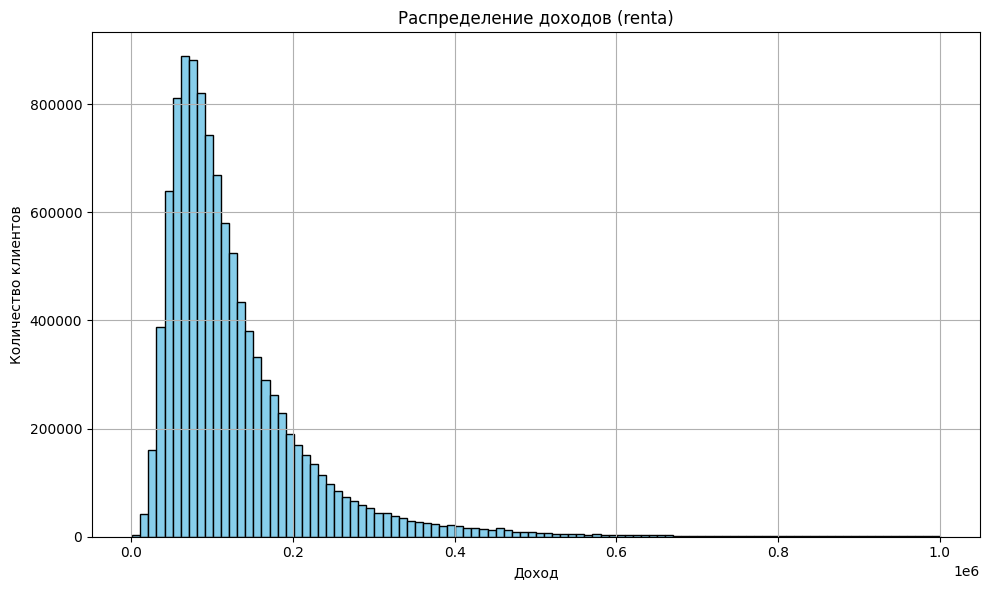

0


In [8]:
# –ü–µ—Ä–µ–¥ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ–º –ø—Ä–æ–ø—É—Å–∫–æ–≤, –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –∏—Å—Å–ª–µ–¥—É–µ–º —Å—Ç–æ–ª–±–µ—Ü renta

renta_clean = df['renta'].dropna()
renta_filtered = renta_clean[renta_clean < 1_000_000]

plt.figure(figsize=(10, 6))
plt.hist(renta_filtered, bins=100, color='skyblue', edgecolor='black')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ—Ö–æ–¥–æ–≤ (renta)')
plt.xlabel('–î–æ—Ö–æ–¥')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤')
plt.grid(True)
plt.tight_layout()
plt.show()

print(len(df.loc[df.renta == 0]))

In [9]:
df['age'] = df['age'].replace(' NA', np.nan)
df.dropna(subset='age', inplace=True)
df['age'] = df['age'].astype(int)
df = df.loc[(df['age'] >= 18) & (df['age'] <= 100)]

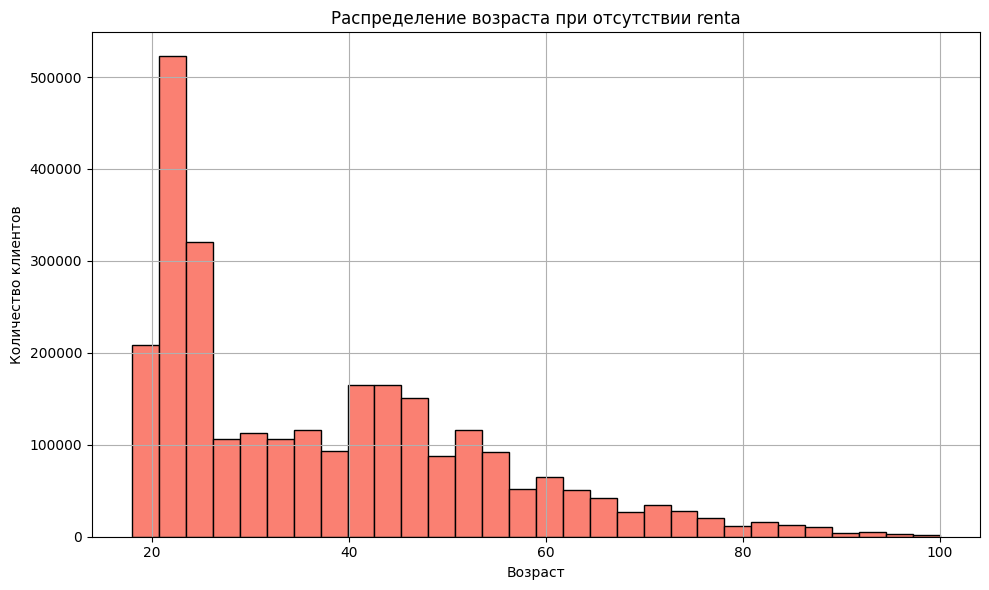

In [10]:
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è: —Ç–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ renta –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç
age_missing_renta = df[df['renta'].isna()]['age'].dropna().astype(float)

plt.figure(figsize=(10, 6))
plt.hist(age_missing_renta, bins=30, color='salmon', edgecolor='black')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ –ø—Ä–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–∏ renta')
plt.xlabel('–í–æ–∑—Ä–∞—Å—Ç')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# –ó–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏:
# conyuemp - –∑–∞–ø–æ–ª–Ω–∏–º 0
# renta - –∑–∞–ø–æ–ª–Ω–∏–º –∏—Å—Ö–æ–¥—è –∏–∑ –º–µ–¥–∏–∞–Ω–Ω–æ–π –∑–∞—Ä–ø–∞–ª–∞—Ç—ã –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –≤–æ–∑—Ä–∞—Å—Ç–∞
# segmento, canal_entrada - —Å–∞–º—ã–º —á–∞—Å—Ç—ã–º –∫–ª–∞—Å—Å–æ–º
# –æ—Å—Ç–∞–ª—å–Ω—ã–µ - –ø—Ä–æ—Å—Ç–æ —É–¥–∞–ª–∏–º, –∏—Ö –Ω–µ –º–Ω–æ–≥–æ

In [11]:
df['conyuemp'] = df['conyuemp'].fillna(0)

bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-18', '18-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

df['age_group'] = pd.cut(df['age'].astype(float), bins=bins, labels=labels, right=False)

median_renta_by_age = df.groupby('age_group')['renta'].median()

def fill_renta(row):
    if pd.isna(row['renta']):
        return median_renta_by_age.get(row['age_group'], np.nan)
    else:
        return row['renta']

df['renta'] = df.apply(fill_renta, axis=1)

for col in ['segmento', 'canal_entrada']:
    most_frequent = df[col].mode(dropna=True)[0]
    df[col] = df[col].fillna(most_frequent)

df.drop(columns=['age_group'], inplace=True)

/tmp/ipykernel_4922/867155631.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_renta_by_age = df.groupby('age_group')['renta'].median()


In [12]:
del median_renta_by_age, most_frequent, renta_clean, renta_filtered

In [13]:
# –°—Ç–æ–ª–±–µ—Ü ult_fec_cli_1t (–ü–æ—Å–ª–µ–¥–Ω—è—è –¥–∞—Ç–∞, –∫–æ–≥–¥–∞ –∫–ª–∏–µ–Ω—Ç –±—ã–ª –ø—Ä–µ–º–∏–∞–ª—å–Ω—ã–º) –∑–∞–ø–æ–ª–Ω–∏–º —Ä–∞–∑–Ω–∏—Ü–µ–π –≤–æ –≤—Ä–µ–º–µ–Ω–∏ –º–µ–∂–¥—É fecha_dato
df['ult_fec_cli_1t'] = pd.to_datetime(df["ult_fec_cli_1t"], format='%Y-%m-%d')
df['days_since_premium'] = (df['fecha_dato'] - df['ult_fec_cli_1t']).dt.days
# –ó–∞–ø–æ–ª–Ω–∏–º NaN –∑–Ω–∞—á–µ–Ω–∏–µ–º 0 (–Ω–∏–∫–æ–≥–¥–∞ –Ω–µ –±—ã–ª –ø—Ä–µ–º–∏–∞–ª—å–Ω—ã–º)
df['days_since_premium'] = df['days_since_premium'].fillna(0).astype(int)
df.drop(columns='ult_fec_cli_1t', inplace=True)

In [14]:
print(f"–æ—Å—Ç–∞–µ—Ç—Å—è {len(df.dropna())/13647309} –¥–∞–Ω–Ω—ã—Ö –æ—Ç –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω—ã—Ö")

–æ—Å—Ç–∞–µ—Ç—Å—è 0.9745520527160336 –¥–∞–Ω–Ω—ã—Ö –æ—Ç –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω—ã—Ö


In [18]:
df.to_pickle("data/df_1.pkl")

In [19]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –¥—É–±–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –æ–¥–Ω–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∑–∞ –º–µ—Å—è—Ü
df[df[["fecha_dato", "ncodpers"]].duplicated()]

Empty DataFrame
Columns: [fecha_dato, ncodpers, ind_empleado, pais_residencia, sexo, age, fecha_alta, ind_nuevo, antiguedad, indrel, indrel_1mes, tiprel_1mes, indresi, indext, conyuemp, canal_entrada, indfall, tipodom, cod_prov, nomprov, ind_actividad_cliente, renta, segmento, ind_ahor_fin_ult1, ind_aval_fin_ult1, ind_cco_fin_ult1, ind_cder_fin_ult1, ind_cno_fin_ult1, ind_ctju_fin_ult1, ind_ctma_fin_ult1, ind_ctop_fin_ult1, ind_ctpp_fin_ult1, ind_deco_fin_ult1, ind_deme_fin_ult1, ind_dela_fin_ult1, ind_ecue_fin_ult1, ind_fond_fin_ult1, ind_hip_fin_ult1, ind_plan_fin_ult1, ind_pres_fin_ult1, ind_reca_fin_ult1, ind_tjcr_fin_ult1, ind_valo_fin_ult1, ind_viv_fin_ult1, ind_nomina_ult1, ind_nom_pens_ult1, ind_recibo_ult1, days_since_premium]
Index: []

In [20]:
print(df.drop_duplicates("ncodpers")["ind_empleado"].value_counts())
# –ü–æ—á—Ç–∏ –≤—Å–µ –±–µ–∑—Ä–∞–±–æ—Ç–Ω—ã–µ. –° —Ç–∞–∫–∏–º–∏ –¥–∞–Ω–Ω—ã–º–∏ - —ç—Ç–æ—Ç —Å—Ç–æ–ª–±–µ—Ü –±–µ—Å–ø–æ–ª–µ–∑–µ–Ω
df = df.drop(columns="ind_empleado")

ind_empleado
N    940781
B       219
F       152
A       148
S         1
Name: count, dtype: int64


In [21]:
print(df.drop_duplicates(["ncodpers"])["pais_residencia"].value_counts())
print(f" –û—Ç–Ω–æ—à–µ–Ω–∏–µ –∏–Ω–æ—Å—Ç—Ä–∞–Ω—Ü–µ–≤ –∏ –≥—Ä–∞–∂–¥–∞–Ω {len(df.loc[df.pais_residencia != 'ES'])/len(df.loc[df.pais_residencia == 'ES'])}")

pais_residencia
ES    937317
FR       314
AR       289
DE       283
GB       277
       ...  
CD         1
BZ         1
ZW         1
DJ         1
JM         1
Name: count, Length: 116, dtype: int64
 –û—Ç–Ω–æ—à–µ–Ω–∏–µ –∏–Ω–æ—Å—Ç—Ä–∞–Ω—Ü–µ–≤ –∏ –≥—Ä–∞–∂–¥–∞–Ω 0.004904080863132537


In [22]:
# –û—á–µ–Ω—å –ø–ª–æ—Ö–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ - —Å—Ç–æ–ª–±–µ—Ü —É–¥–∞–ª–∏–º
df = df.drop(columns="pais_residencia")

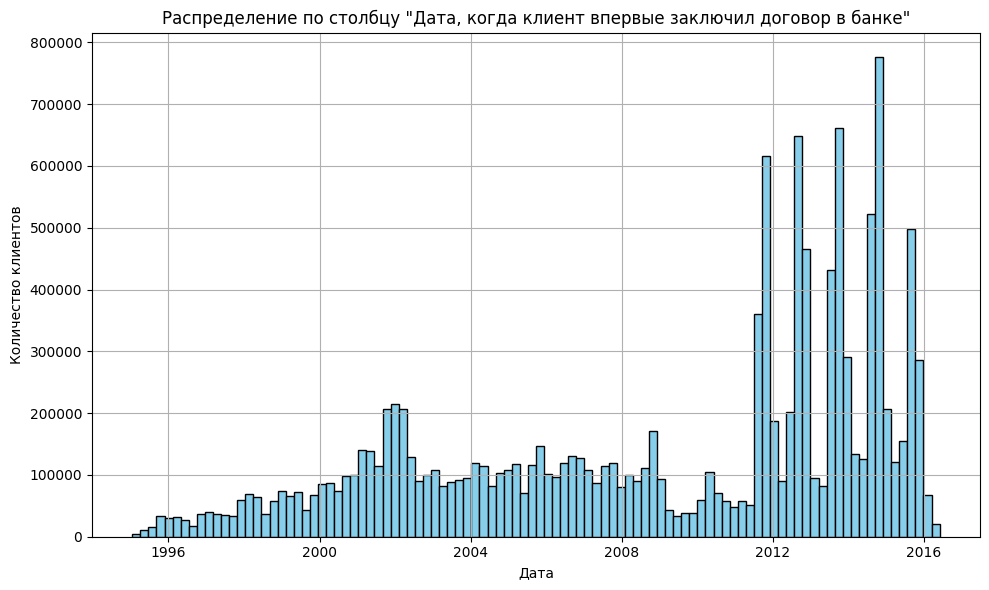

In [ ]:
df.fecha_alta = pd.to_datetime(df["fecha_alta"], format='%Y-%m-%d')

plt.figure(figsize=(10, 6))
plt.hist(df.fecha_alta, bins=100, color='skyblue', edgecolor='black')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —Å—Ç–æ–ª–±—Ü—É "–î–∞—Ç–∞, –∫–æ–≥–¥–∞ –∫–ª–∏–µ–Ω—Ç –≤–ø–µ—Ä–≤—ã–µ –∑–∞–∫–ª—é—á–∏–ª –¥–æ–≥–æ–≤–æ—Ä –≤ –±–∞–Ω–∫–µ"')
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤')
plt.grid(True)
plt.tight_layout()
plt.show()

–í—ã–±—Ä–æ—Å—ã –µ—Å—Ç—å, –∏ —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω—ã –ø–æ—è–≤–ª–µ–Ω–∏–µ–º –º–æ–±–∏–ª—å–Ω–æ–≥–æ –±–∞–Ω–∫–∏–Ω–≥–∞

In [24]:
df.drop_duplicates("ncodpers")["ind_nuevo"].value_counts()

ind_nuevo
0.0    787527
1.0    153774
Name: count, dtype: int64

In [25]:
df["antiguedad"] = df["antiguedad"].astype(int)
print(df.drop_duplicates("ncodpers")["antiguedad"].describe())
print(f"–°–ª—É—á–∞–µ–≤ –∑–∞–ø–∏—Å–∏ –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ —Å—Ç–∞–∂–∞ {len(df.loc[df.antiguedad < 0])}")
# –Ω–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ —è–≤–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –Ω–µ–≤–µ—Ä–Ω–æ

df = df[df["antiguedad"] >= 0]

count    941301.000000
mean         67.389104
std        1459.270279
min     -999999.000000
25%          12.000000
50%          43.000000
75%         123.000000
max         250.000000
Name: antiguedad, dtype: float64
–°–ª—É—á–∞–µ–≤ –∑–∞–ø–∏—Å–∏ –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ —Å—Ç–∞–∂–∞ 38


In [26]:
df.drop_duplicates("ncodpers")["indrel"].value_counts()
# –ü–ª–æ—Ö–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ - —Å—Ç–æ–ª–±–µ—Ü —É–¥–∞–ª–∏–º
df = df.drop(columns="indrel")

In [27]:
df.drop_duplicates("ncodpers")["indrel_1mes"].value_counts()
# –ü–æ—á—Ç–∏ –≤—Å–µ –ø—Ä–µ–º–∏–∞–ª—å–Ω—ã–µ –≤ –Ω–∞—á–∞–ª–µ –º–µ—Å—è—Ü–∞ - –ø–ª–æ—Ö–æ–π –ø—Ä–∏–∑–Ω–∞–∫
df = df.drop(columns="indrel_1mes")

In [28]:
print(df["tiprel_1mes"].value_counts())

# –ö–æ–ª-–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π –≤ P, R, N < 0.1%
# –≠—Ç–∏ –∫–ª–∞—Å—Å—ã –Ω–µ –∏–º–µ—é—Ç –±–∏–∑–Ω–µ—Å-—Ü–µ–Ω–Ω–æ—Å—Ç–∏, –ª–æ–≥–∏—á–Ω–æ –æ—Ç–Ω–µ—Å—Ç–∏ –∏—Ö –∫ "I" (–Ω–µ–∞–∫—Ç–∏–≤–Ω—ã–º).

df['tiprel_1mes'] = df['tiprel_1mes'].replace({'P': 'I', 'R': 'I', 'N': 'I'})

tiprel_1mes
I    7265802
A    6095243
P       4643
R        867
N          2
Name: count, dtype: int64


In [29]:
print(df.drop_duplicates("ncodpers")["indresi"].value_counts())
# –ü–ª–æ—Ö–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏
df = df.drop(columns="indresi")

indresi
S    937315
N      3984
Name: count, dtype: int64


In [30]:
print(df.drop_duplicates("ncodpers")["conyuemp"].value_counts())
# –¢–æ–∂–µ —Å–∞–º–æ–µ
df = df.drop(columns="conyuemp")

conyuemp
0    941036
N       262
S         1
Name: count, dtype: int64


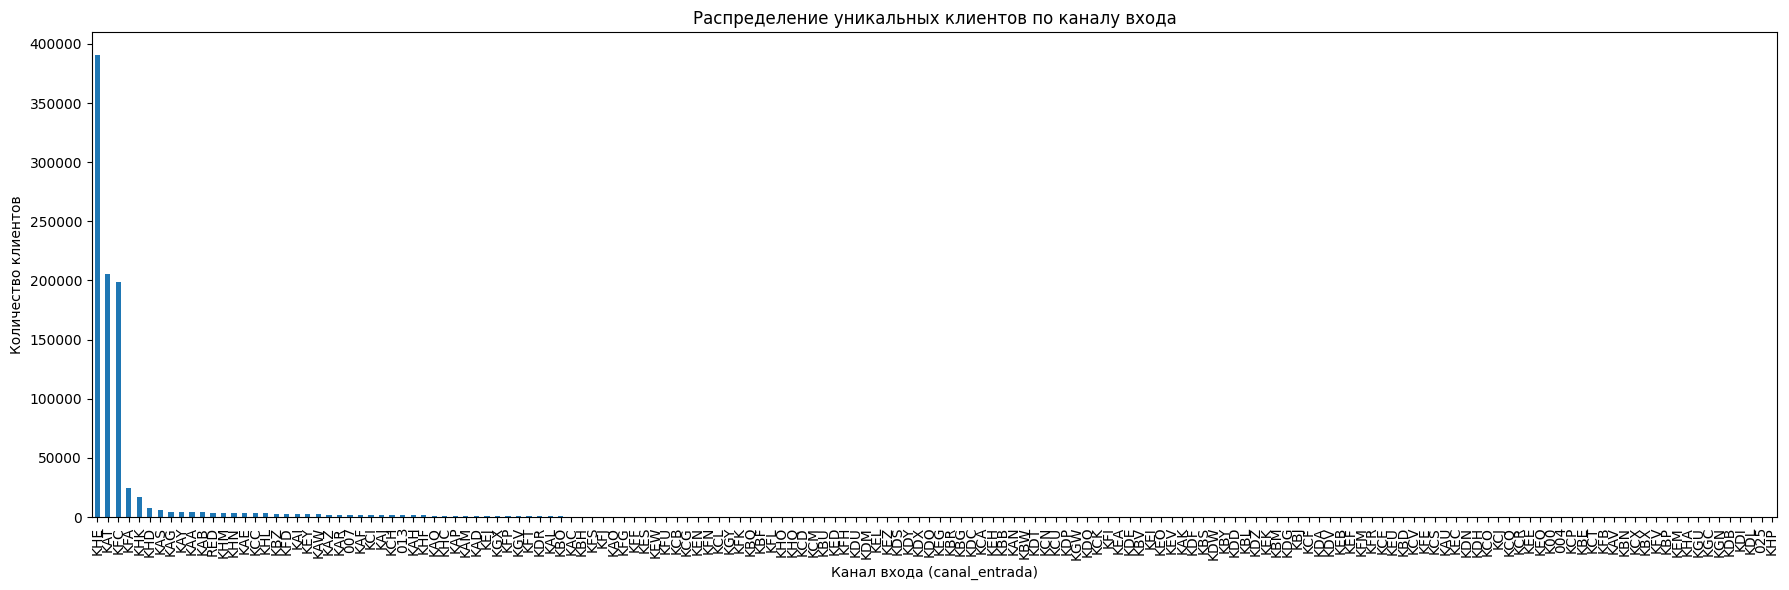

In [ ]:
df_unique = df.drop_duplicates(subset='ncodpers')

canal_counts = df_unique['canal_entrada'].value_counts()

plt.figure(figsize=(18, 6))
canal_counts.plot(kind='bar')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ –∫–∞–Ω–∞–ª—É –≤—Ö–æ–¥–∞')
plt.xlabel('–ö–∞–Ω–∞–ª –≤—Ö–æ–¥–∞ (canal_entrada)')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


–•–æ—Ä–æ—à–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ

In [32]:
print(df.drop_duplicates("ncodpers")["indfall"].value_counts())
# –ü–æ—á—Ç–∏ –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è "N"
df = df.drop(columns="indfall")

indfall
N    939183
S      2116
Name: count, dtype: int64


In [33]:
print(df.drop_duplicates("ncodpers")["tipodom"].value_counts())
# –¢–æ–ª—å–∫–æ –æ–¥–∏–Ω —Ç–∏–ø –∑–Ω–∞—á–µ–Ω–∏—è
df = df.drop(columns="tipodom")

tipodom
1.0    941298
Name: count, dtype: int64


In [35]:
print(df.drop_duplicates("ncodpers")["cod_prov"].value_counts())

cod_prov
28.0    299707
8.0      89977
46.0     48637
41.0     41115
15.0     29142
         ...  
1.0       2655
44.0      1566
42.0      1277
52.0       644
51.0       519
Name: count, Length: 52, dtype: int64


In [36]:
df.drop_duplicates(["ncodpers"], keep="last")["nomprov"].value_counts()

nomprov
MADRID       299760
BARCELONA     90049
VALENCIA      48636
SEVILLA       41098
CORU√ëA, A     29132
              ...  
ALAVA          2655
TERUEL         1567
SORIA          1277
MELILLA         644
CEUTA           523
Name: count, Length: 52, dtype: int64

In [37]:
df["ind_actividad_cliente"].value_counts()

ind_actividad_cliente
0.0    7345552
1.0    6142320
Name: count, dtype: int64

In [38]:
# –í–∏–¥–Ω–æ, —á—Ç–æ –Ω–µ–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π –º–µ—Å—è—Ü –Ω–µ –∑–Ω–∞—á–∏—Ç –Ω–µ–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ
df.loc[(df["ind_actividad_cliente"] == 0) & (df["tiprel_1mes"] == 'I')]

fecha_dato  ncodpers sexo  age fecha_alta  ind_nuevo  antiguedad  \
1        2015-01-28   1050611    V   23 2012-08-10        0.0          35   
2        2015-01-28   1050612    V   23 2012-08-10        0.0          35   
3        2015-01-28   1050613    H   22 2012-08-10        0.0          35   
5        2015-01-28   1050615    H   23 2012-08-10        0.0          35   
6        2015-01-28   1050616    H   23 2012-08-10        0.0          35   
...             ...       ...  ...  ...        ...        ...         ...   
13647302 2016-05-28   1166767    V   25 2013-08-14        0.0          33   
13647303 2016-05-28   1166766    V   25 2013-08-14        0.0          33   
13647304 2016-05-28   1166765    V   22 2013-08-14        0.0          33   
13647305 2016-05-28   1166764    V   23 2013-08-14        0.0          33   
13647307 2016-05-28   1166789    H   22 2013-08-14        0.0          33   

         tiprel_1mes indext canal_entrada  cod_prov      nomprov  \
1                  I      S           KHE      13.0  CIUDAD REAL   
2                  I      N           KHE      13.0  CIUDAD REAL   
3                  I      N           KHD      50.0     ZARAGOZA   
5                  I      N           KHE      45.0       TOLEDO   
6                  I      N           KHE      24.0         LEON   
...              ...    ...           ...       ...          ...   
13647302           I      S           KHE      50.0     ZARAGOZA   
13647303           I      N           KHE      50.0     ZARAGOZA   
13647304           I      N           KHE      50.0     ZARAGOZA   
13647305           I      N           KHE      26.0    RIOJA, LA   
13647307           I      N           KHE      50.0     ZARAGOZA   

          ind_actividad_cliente      renta            segmento  \
1                           0.0   35548.74  03 - UNIVERSITARIO   
2                           0.0  122179.11  03 - UNIVERSITARIO   
3                           0.0  119775.54  03 - UNIVERSITARIO   
5                           0.0   22220.04  03 - UNIVERSITARIO   
6                           0.0  295590.36  03 - UNIVERSITARIO   
...                         ...        ...                 ...   
13647302                    0.0   73134.81  03 - UNIVERSITARIO   
13647303                    0.0   50945.25  03 - UNIVERSITARIO   
13647304                    0.0   43912.17  03 - UNIVERSITARIO   
13647305                    0.0   23334.99  03 - UNIVERSITARIO   
13647307                    0.0  199592.82  03 - UNIVERSITARIO   

          ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  \
1                         0                  0                 1   
2                         0                  0                 1   
3                         0                  0                 0   
5                         0                  0                 1   
6                         0                  0                 1   
...                     ...                ...               ...   
13647302                  0                  0                 1   
13647303                  0                  0                 1   
13647304                  0                  0                 1   
13647305                  0                  0                 1   
13647307                  0                  0                 1   

          ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  \
1                         0                 0                  0   
2                         0                 0                  0   
3                         0                 0                  0   
5                         0                 0                  0   
6                         0                 0                  0   
...                     ...               ...                ...   
13647302                  0                 0                  0   
13647303                  0                 0                  0   
13647304                  0                 0

In [39]:
print(df.drop_duplicates("ncodpers")["renta"].describe())

# –ù–∞–π–¥—ë–º 1-–π –∏ 99-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª–∏
lower, upper = df['renta'].quantile([0.01, 0.99])

# –û–≥—Ä–∞–Ω–∏—á–∏–º –∑–Ω–∞—á–µ–Ω–∏—è –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö [1%, 99%]
df['renta'] = df['renta'].clip(lower, upper)

count    9.412650e+05
mean     1.251731e+05
std      2.019961e+05
min      1.202730e+03
25%      7.859862e+04
50%      9.532332e+04
75%      1.317545e+05
max      2.889440e+07
Name: renta, dtype: float64


In [40]:
df.drop_duplicates("ncodpers")["segmento"].value_counts()
# –í—Ä–æ–¥–µ –≤—Å–µ –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –Ω–æ—Ä–º—ã

segmento
02 - PARTICULARES     636684
03 - UNIVERSITARIO    272386
01 - TOP               32229
Name: count, dtype: int64

In [41]:
df.to_pickle("data/df_1.pkl")

EDA

In [6]:
df = pd.read_pickle('data/df_1.pkl')

In [7]:
product_cols = df.columns[15:39]

# –ü–æ—Å–º–æ—Ç—Ä–∏–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–æ–¥—É–∫—Ç–æ–≤–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞
for col in product_cols:
    unique_vals = df[col].dropna().unique()
    if set(unique_vals) - {0, 1}:
        print(f"{col}: {unique_vals}")
        
# –Ω–µ—Ç –≤—ã–≤–æ–¥–∞ - –∑–Ω–∞—á–∏—Ç —Ç–∞–º —Ç–æ–ª—å–∫–æ 0 –∏ 1

In [8]:
product_usage_all = df[product_cols].sum() / df.shape[0]
product_usage_all = product_usage_all.sort_values(ascending=False)

df_unique_clients = df.sort_values('fecha_dato').drop_duplicates('ncodpers', keep='last')

# –î–æ–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, —É –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å –ø—Ä–æ–¥—É–∫—Ç
product_usage_unique = df_unique_clients[product_cols].sum() / df_unique_clients.shape[0]
product_usage_unique = product_usage_unique.sort_values(ascending=False)

product_stats = pd.DataFrame({
    'Usage (All Records)': product_usage_all,
    'Usage (Unique Clients)': product_usage_unique
})
product_stats.sort_values('Usage (All Records)')


Usage (All Records)  Usage (Unique Clients)
ind_aval_fin_ult1             0.000023                0.000017
ind_ahor_fin_ult1             0.000104                0.000083
ind_cder_fin_ult1             0.000398                0.000336
ind_ctju_fin_ult1             0.001561                0.001257
ind_deme_fin_ult1             0.001680                0.001085
ind_deco_fin_ult1             0.001767                0.000338
ind_pres_fin_ult1             0.002558                0.002117
ind_viv_fin_ult1              0.003891                0.003145
ind_hip_fin_ult1              0.005937                0.004808
ind_plan_fin_ult1             0.009273                0.007816
ind_ctma_fin_ult1             0.009805                0.008602
ind_fond_fin_ult1             0.018679                0.015593
ind_valo_fin_ult1             0.025890                0.022757
ind_dela_fin_ult1             0.043431                0.033155
ind_ctpp_fin_ult1             0.043771                0.035334
ind_tjcr_fin_ult1             0.044893                0.036996
ind_reca_fin_ult1             0.052372                0.048726
ind_nomina_ult1               0.055283                0.051368
ind_nom_pens_ult1             0.060014                0.056129
ind_cno_fin_ult1              0.081771                0.077619
ind_ecue_fin_ult1             0.083619                0.080587
ind_recibo_ult1               0.129350                0.120533
ind_ctop_fin_ult1             0.130052                0.106574
ind_cco_fin_ult1              0.662287                0.596541

In [9]:
# –ö–æ–ø–∏–∏ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ –¥–ª—è –≥—Ä—É–ø–ø
df_men = df[df['sexo'] == 'H']
df_women = df[df['sexo'] == 'V']
df_active = df[df['ind_actividad_cliente'] == 1]

# –°—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç, —É—á–∏—Ç—ã–≤–∞—è —Ç–æ–ª—å–∫–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, —É –∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–æ–¥—É–∫—Ç = 1
avg_age_per_product = {
    col: df.loc[df[col] == 1, 'age'].astype(float).mean()
    for col in product_cols
}

product_stats = pd.DataFrame({
    'Usage (All Records)': df[product_cols].sum() / len(df),
    'Usage (Unique Clients)': df.drop_duplicates('ncodpers')[product_cols].sum() / df['ncodpers'].nunique(),
    'Usage by Men': df_men[product_cols].sum() / len(df_men),
    'Usage by Women': df_women[product_cols].sum() / len(df_women),
    'Usage by Active Clients': df_active[product_cols].sum() / len(df_active),
    'Average Age (Users)': pd.Series(avg_age_per_product)
})


In [10]:
product_stats.sort_values(by='Usage (All Records)', ascending=False)

Usage (All Records)  Usage (Unique Clients)  Usage by Men  \
ind_cco_fin_ult1              0.662287                0.615159      0.682077   
ind_ctop_fin_ult1             0.130052                0.112347      0.106878   
ind_recibo_ult1               0.129350                0.102658      0.111988   
ind_ecue_fin_ult1             0.083619                0.063906      0.070855   
ind_cno_fin_ult1              0.081771                0.063298      0.073649   
ind_nom_pens_ult1             0.060014                0.046914      0.054569   
ind_nomina_ult1               0.055283                0.042302      0.050342   
ind_reca_fin_ult1             0.052372                0.038943      0.039884   
ind_tjcr_fin_ult1             0.044893                0.038140      0.034142   
ind_ctpp_fin_ult1             0.043771                0.038316      0.037179   
ind_dela_fin_ult1             0.043431                0.039227      0.038193   
ind_valo_fin_ult1             0.025890                0.021547      0.016361   
ind_fond_fin_ult1             0.018679                0.014748      0.012497   
ind_ctma_fin_ult1             0.009805                0.011671      0.008676   
ind_plan_fin_ult1             0.009273                0.007914      0.007569   
ind_hip_fin_ult1              0.005937                0.005267      0.003688   
ind_viv_fin_ult1              0.003891                0.003424      0.003195   
ind_pres_fin_ult1             0.002558                0.002213      0.001752   
ind_deco_fin_ult1             0.001767                0.003727      0.001673   
ind_deme_fin_ult1             0.001680                0.001719      0.001534   
ind_ctju_fin_ult1             0.001561                0.002171      0.001612   
ind_cder_fin_ult1             0.000398                0.000325      0.000121   
ind_ahor_fin_ult1             0.000104                0.000093      0.000056   
ind_aval_fin_ult1             0.000023                0.000020      0.000013   

                   Usage by Women  Usage by Active Clients  \
ind_cco_fin_ult1         0.645807                 0.755119   
ind_ctop_fin_ult1        0.149355                 0.193557   
ind_recibo_ult1          0.143810                 0.282217   
ind_ecue_fin_ult1        0.094250                 0.170676   
ind_cno_fin_ult1         0.088537                 0.177265   
ind_nom_pens_ult1        0.064549                 0.131375   
ind_nomina_ult1          0.059400                 0.121041   
ind_reca_fin_ult1        0.062774                 0.107261   
ind_tjcr_fin_ult1        0.053849                 0.098027   
ind_ctpp_fin_ult1        0.049262                 0.079161   
ind_dela_fin_ult1        0.047795                 0.094941   
ind_valo_fin_ult1        0.033828                 0.056285   
ind_fond_fin_ult1        0.023829                 0.040738   
ind_ctma_fin_ult1        0.010745                 0.017025   
ind_plan_fin_ult1        0.010693                 0.020248   
ind_hip_fin_ult1         0.007808                 0.013004   
ind_viv_fin_ult1         0.004471                 0.006637   
ind_pres_fin_ult1        0.003230                 0.004595   
ind_deco_fin_ult1        0.001845                 0.003482   
ind_deme_fin_ult1        0.001802                 0.003678   
ind_ctju_fin_ult1        0.001519                 0.002641   
ind_cder_fin_ult1        0.000629                 0.000793   
ind_ahor_fin_ult1        0.000143                 0.000166   
ind_aval_fin_ult1        0.000032                 0.000051   

                   Average Age (Users)  
ind_cco_fin_ult1             37.994269  
ind_ctop_fin_ult1            54.208430  
ind_recibo_ult1              44.113583  
ind_ecue_fin_ult1            48.351431  
ind_cno_fin_ult1             44.132745  
ind_nom_pens_ult1            45.061387  
ind_nomina_ult1              43.253607  
ind_reca_fin_ult1            47.168552  
ind_tjcr_fin_ult1            48.189366  
ind_ctpp_fin_ult1            49.637083  
ind_dela_fin_ult

In [11]:
# –î–æ–±–∞–≤–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥—É–∫—Ç–æ–≤ —É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
df["prod_count"] = df[product_cols].sum(axis=1)

# –ü–æ–¥—Å—á—ë—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –±–µ–∑ –ø—Ä–æ–¥—É–∫—Ç–æ–≤ ("—Ö–æ–ª–æ–¥–Ω—ã—Ö") –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö
cold_users_total = (df["prod_count"] == 0).sum()
print(f"–û–±—â–µ–µ —á–∏—Å–ª–æ —Ö–æ–ª–æ–¥–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: {cold_users_total}")

# –ü–æ–¥—Å—á—ë—Ç "—Ö–æ–ª–æ–¥–Ω—ã—Ö" –≤ –ø–æ—Å–ª–µ–¥–Ω–µ–º –º–µ—Å—è—Ü–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞
df_last = df.sort_values("fecha_dato").drop_duplicates("ncodpers", keep="last")
cold_users_last = (df_last["prod_count"] == 0).sum()
print(f"–•–æ–ª–æ–¥–Ω—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –≤ –ø–æ—Å–ª–µ–¥–Ω–µ–º –º–µ—Å—è—Ü–µ: {cold_users_last}")


–û–±—â–µ–µ —á–∏—Å–ª–æ —Ö–æ–ª–æ–¥–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: 2535072
–•–æ–ª–æ–¥–Ω—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –≤ –ø–æ—Å–ª–µ–¥–Ω–µ–º –º–µ—Å—è—Ü–µ: 250654


In [12]:
# –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –ø–æ –º–µ—Å—è—Ü—É –∏ –ø–æ–¥—Å—á—ë—Ç –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–π –ø–æ –∫–∞–∂–¥–æ–º—É –ø—Ä–æ–¥—É–∫—Ç—É
monthly_product_counts = df.groupby("fecha_dato")[product_cols].sum()

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
monthly_product_counts


ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  \
fecha_dato                                                           
2015-01-28                 88                 19            485057   
2015-02-28                 89                 20            486341   
2015-03-28                 89                 21            487289   
2015-04-28                 87                 21            487818   
2015-05-28                 85                 21            488955   
2015-06-28                 83                 21            493706   
2015-07-28                 82                 19            503601   
2015-08-28                 82                 19            514522   
2015-09-28                 81                 19            529297   
2015-10-28                 81                 18            545204   
2015-11-28                 81                 18            551490   
2015-12-28                 79                 18            556736   
2016-01-28                 78                 18            559264   
2016-02-28                 78                 16            559695   
2016-03-28                 78                 16            561120   
2016-04-28                 77                 16            561475   
2016-05-28                 78                 16            561275   

            ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  \
fecha_dato                                                           
2015-01-28                300             58572               1505   
2015-02-28                300             59872               1453   
2015-03-28                313             60809               1405   
2015-04-28                313             62124               1357   
2015-05-28                313             63322               1306   
2015-06-28                316             59837               1244   
2015-07-28                320             61602               1188   
2015-08-28                323             62992               1163   
2015-09-28                319             63754               1155   
2015-10-28                317             65443               1161   
2015-11-28                319             67376               1139   
2015-12-28                319             66238               1138   
2016-01-28                323             67406               1146   
2016-02-28                328             68631               1145   
2016-03-28                319             70135               1182   
2016-04-28                314             71751               1189   
2016-05-28                316             73056               1181   

            ind_ctma_fin_ult1  ind_ctop_fin_ult1  ind_ctpp_fin_ult1  \
fecha_dato                                                            
2015-01-28               8235             105709              36052   
2015-02-28               8078             105412              35921   
2015-03-28               7776             105135              35760   
2015-04-28               7436             104734              35594   
2015-05-28               7084             104594              35472   
2015-06-28               6920             104304              35326   
2015-07-28               6938             103993              35129   
2015-08-28               6993             103754              34995   
2015-09-28               7180             103374              34780   
2015-10-28               7451             102993              34623   
2015-11-28               7839             102589              34413   
2015-12-28               8191             102268              34219   
2016-01-28               8254             101846              33990   
2016-02-28               8410             101409              33784   
2016-03-28               8714             101052              33613   
2016-04-28               8651             100707              33457   
2016-05-28               8097             100249              33252   



In [13]:
# –ü–∞–ø–∫–∞ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–æ–≤
ASSETS_DIR = "assets"
os.makedirs(ASSETS_DIR, exist_ok=True)

# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –ø—Ä–æ–¥—É–∫—Ç–æ–≤ –ø–æ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç–∏ (—Å—É–º–º–∞ –ø–æ –≤—Å–µ–º –º–µ—Å—è—Ü–∞–º)
product_totals = monthly_product_counts.sum().sort_values(ascending=False)
sorted_products = product_totals.index.tolist()

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –ø–æ 4 –ø—Ä–æ–¥—É–∫—Ç–∞ –Ω–∞ –∫–∞–∂–¥–æ–º
num_plots = len(sorted_products) // 4 + int(len(sorted_products) % 4 > 0)

for i in range(num_plots):
    products_chunk = sorted_products[i*4:(i+1)*4]
    ax = monthly_product_counts[products_chunk].plot(figsize=(12, 6), marker='o')
    plt.title(f"–û—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –ø—Ä–æ–¥—É–∫—Ç–æ–≤ ({i*4+1}‚Äì{i*4+len(products_chunk)})")
    plt.xlabel("–ú–µ—Å—è—Ü")
    plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–π")
    plt.grid(True)
    plt.legend(title="–ü—Ä–æ–¥—É–∫—Ç—ã")
    plt.tight_layout()
    
    filename = os.path.join(ASSETS_DIR, f"product_trends_{i+1}.png")
    plt.savefig(filename)
    plt.close()


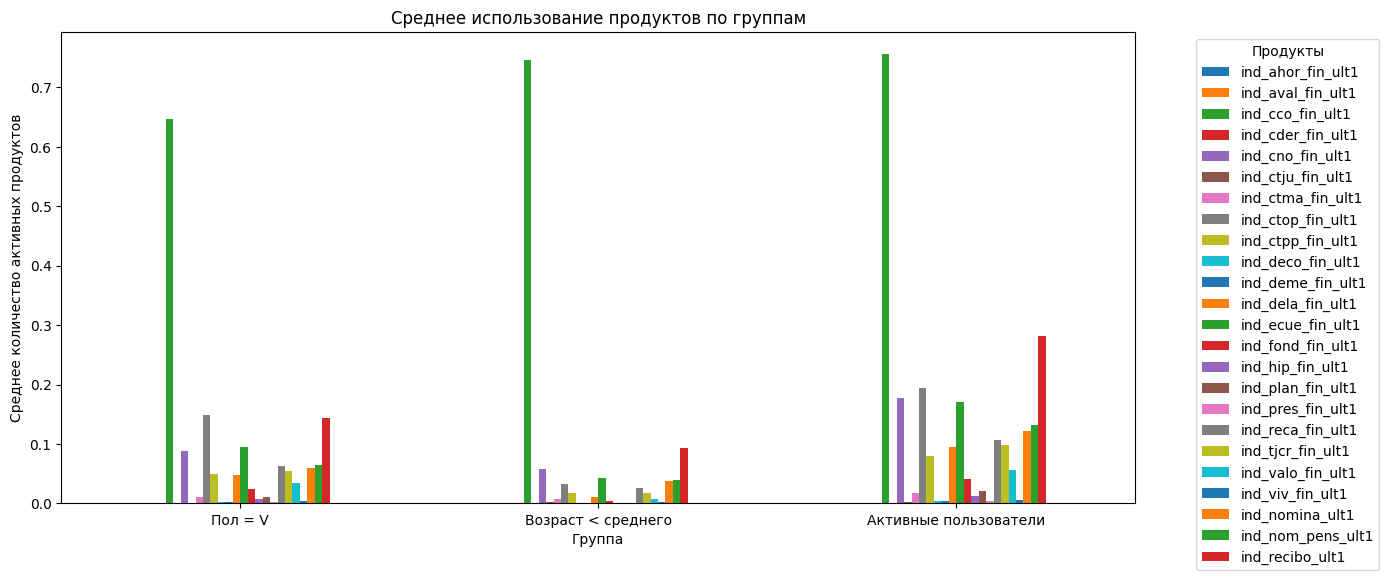

In [14]:
# –û–ø—Ä–µ–¥–µ–ª–∏–º —Ñ–∏–ª—å—Ç—Ä—ã
most_common_gender = df["sexo"].mode()[0]
mean_age = df["age"].mean()
is_younger = df["age"] < mean_age
is_active = df["ind_actividad_cliente"] == 1

# –°—Ä–µ–¥–Ω–µ–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–æ–¥—É–∫—Ç–æ–≤ –≤ –∫–∞–∂–¥–æ–π –≥—Ä—É–ø–ø–µ
usage_by_gender = df[df["sexo"] == most_common_gender][product_cols].mean()
usage_by_young = df[is_younger][product_cols].mean()
usage_by_active = df[is_active][product_cols].mean()

# –û–±—ä–µ–¥–∏–Ω–∏–º –≤ –æ–¥–∏–Ω –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
group_usage = pd.DataFrame({
    f"–ü–æ–ª = {most_common_gender}": usage_by_gender,
    "–í–æ–∑—Ä–∞—Å—Ç < —Å—Ä–µ–¥–Ω–µ–≥–æ": usage_by_young,
    "–ê–∫—Ç–∏–≤–Ω—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏": usage_by_active
})

# –¢—Ä–∞–Ω—Å–ø–æ–Ω–∏—Ä—É–µ–º –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è
group_usage = group_usage.T

# –ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
ax = group_usage.plot(kind="bar", figsize=(14, 6))
plt.title("–°—Ä–µ–¥–Ω–µ–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–æ–¥—É–∫—Ç–æ–≤ –ø–æ –≥—Ä—É–ø–ø–∞–º")
plt.xlabel("–ì—Ä—É–ø–ø–∞")
plt.ylabel("–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø—Ä–æ–¥—É–∫—Ç–æ–≤")
plt.xticks(rotation=0)
plt.legend(title="–ü—Ä–æ–¥—É–∫—Ç—ã", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –≥—Ä–∞—Ñ–∏–∫
group_usage_path = os.path.join(ASSETS_DIR, "group_product_usage.png")
plt.savefig(group_usage_path)
plt.close()

In [11]:
top_products = product_cols[:6]

for prod in top_products:
    plt.figure(figsize=(12,5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[prod], y=df["renta"])
    plt.title(f"–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ—Ö–æ–¥–∞ –ø–æ –ø—Ä–æ–¥—É–∫—Ç—É {prod}")
    plt.xlabel("–ü—Ä–æ–¥—É–∫—Ç –∞–∫—Ç–∏–≤–µ–Ω (1) / –Ω–µ–∞–∫—Ç–∏–≤–µ–Ω (0)")
    plt.ylabel("–î–æ—Ö–æ–¥ (renta)")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[prod], y=df["age"])
    plt.title(f"–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ –ø–æ –ø—Ä–æ–¥—É–∫—Ç—É {prod}")
    plt.xlabel("–ü—Ä–æ–¥—É–∫—Ç –∞–∫—Ç–∏–≤–µ–Ω (1) / –Ω–µ–∞–∫—Ç–∏–≤–µ–Ω (0)")
    plt.ylabel("–í–æ–∑—Ä–∞—Å—Ç")
    
    plt.tight_layout()
    save_path = os.path.join(ASSETS_DIR, f"{prod}_income_age_boxplot.png")
    plt.savefig(save_path)
    plt.close()


In [15]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏, —Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–µ–µ –ø–æ –ø—Ä–æ–¥—É–∫—Ç–∞–º
usage_by_activity = df.groupby("ind_actividad_cliente")[product_cols].mean()

# –¢—Ä–∞–Ω—Å–ø–æ–Ω–∏—Ä—É–µ–º –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–∞
usage_by_activity = usage_by_activity.T

# –ü–æ—Å—Ç—Ä–æ–∏–º grouped bar chart
ax = usage_by_activity.plot(kind="bar", figsize=(14,6))
plt.title("–°—Ä–µ–¥–Ω–µ–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–æ–¥—É–∫—Ç–æ–≤ —É –∞–∫—Ç–∏–≤–Ω—ã—Ö –∏ –Ω–µ–∞–∫—Ç–∏–≤–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤")
plt.xlabel("–ü—Ä–æ–¥—É–∫—Ç—ã")
plt.ylabel("–°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (–¥–æ–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –ø—Ä–æ–¥—É–∫—Ç–æ–º)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="–ê–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –∫–ª–∏–µ–Ω—Ç–∞", labels=["–ù–µ–∞–∫—Ç–∏–≤–Ω—ã–π (0)", "–ê–∫—Ç–∏–≤–Ω—ã–π (1)"])
plt.tight_layout()

save_path = os.path.join(ASSETS_DIR, "product_usage_by_activity.png")
plt.savefig(save_path)
plt.close()

In [16]:
# –û—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ –∫–ª–∏–µ–Ω—Ç—É –∏ –¥–∞—Ç–µ
df_sorted = df.sort_values(['ncodpers', 'fecha_dato'])

# –°–æ–∑–¥–∞–¥–∏–º –∫–æ–ª–æ–Ω–∫—É —Å –ø—Ä–µ–¥—ã–¥—É—â–∏–º —Å—Ç–∞—Ç—É—Å–æ–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞
df_sorted['prev_tiprel'] = df_sorted.groupby('ncodpers')['tiprel_1mes'].shift(1)

# –û—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –ø—Ä–µ–¥—ã–¥—É—â–∏–π —Å—Ç–∞—Ç—É—Å –µ—Å—Ç—å (—Ç.–µ. –µ—Å—Ç—å –ø–µ—Ä–µ—Ö–æ–¥)
transitions = df_sorted.dropna(subset=['prev_tiprel'])

# –ü–æ—Å—Ç—Ä–æ–∏–º —Ç–∞–±–ª–∏—Ü—É –ø–µ—Ä–µ—Ö–æ–¥–æ–≤: —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –∏–∑ prev_tiprel –ø–µ—Ä–µ—à–ª–∏ –≤ tiprel_1mes
transition_matrix = pd.crosstab(transitions['prev_tiprel'], transitions['tiprel_1mes'])

# –ù–æ—Ä–º–∏—Ä—É–µ–º –ø–æ —Å—Ç—Ä–æ–∫–∞–º, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø–µ—Ä–µ—Ö–æ–¥–æ–≤
transition_probs = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º heatmap
plt.figure(figsize=(8,6))
sns.heatmap(transition_probs, annot=True, fmt=".2f", cmap="Blues")
plt.title("–ú–∞—Ç—Ä–∏—Ü–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –ø–µ—Ä–µ—Ö–æ–¥–æ–≤ —Å—Ç–∞—Ç—É—Å–æ–≤ tiprel_1mes –∑–∞ –º–µ—Å—è—Ü")
plt.ylabel("–°—Ç–∞—Ç—É—Å –≤ –ø—Ä–æ—à–ª–æ–º –º–µ—Å—è—Ü–µ")
plt.xlabel("–°—Ç–∞—Ç—É—Å –≤ —Ç–µ–∫—É—â–µ–º –º–µ—Å—è—Ü–µ")
plt.tight_layout()

save_path = os.path.join(ASSETS_DIR, "tiprel_1mes_transition_heatmap.png")
plt.savefig(save_path)
plt.close()

In [14]:
df.to_parquet("data/df_clean.parquet")
monthly_product_counts.to_parquet("data/monthly_product_counts.parquet")

In [17]:
AWS_ACCESS_KEY_ID = os.environ.get("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.environ.get("AWS_SECRET_ACCESS_KEY")
S3_SERVICE_NAME = "s3"
S3_ENDPOINT_URL = os.environ.get("S3_ENDPOINT_URL")
BUCKET_NAME = os.environ.get("S3_BUCKET_NAME")

session = boto3.session.Session()

s3 = session.client(
    service_name=S3_SERVICE_NAME,
    endpoint_url=S3_ENDPOINT_URL,
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
)

df_clean = "final_project/data/df_clean_parquet/"
s3.upload_file("data/df_clean.parquet", BUCKET_NAME, df_clean)

monthly_product_counts = "final_project/data/monthly_product_counts/"
s3.upload_file("data/monthly_product_counts.parquet", BUCKET_NAME, monthly_product_counts)

In [ ]:
TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000
EXPERIMENT_NAME = "final_project_1"
RUN_NAME = "EDA"

os.environ["MLFLOW_S3_ENDPOINT_URL"] = os.getenv("S3_ENDPOINT_URL")
os.environ["AWS_ACCESS_KEY_ID"] = os.getenv("AWS_ACCESS_KEY_ID")
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv("AWS_SECRET_ACCESS_KEY")

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    mlflow.log_artifact(ASSETS_DIR)
    mlflow.log_artifact("main.ipynb")
    mlflow.log_artifact("data/df_clean.parquet")
    mlflow.log_artifact("data/monthly_product_counts.parquet")

üèÉ View run EDA at: http://127.0.0.1:5000/#/experiments/3/runs/d0c1475b656a4193a3912f59661ac502
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/3


: 

–í—ã–≤–æ–¥—ã –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö –∏ –∞–Ω–∞–ª–∏–∑–∞

1. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–ü–æ–ª—è fecha_dato, fecha_alta –∏ ult_fec_cli_1t –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –∫ —Ç–∏–ø—É datetime.

–û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤—ã–ø–æ–ª–Ω–µ–Ω–∞ —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:

–ü–æ–ª–µ conyuemp: –ø—Ä–æ–ø—É—Å–∫–∏ –∑–∞–ø–æ–ª–Ω–µ–Ω—ã –∑–Ω–∞—á–µ–Ω–∏–µ–º 0.

–ü–æ–ª–µ renta: –ø—Ä–æ–ø—É—Å–∫–∏ –∑–∞–ø–æ–ª–Ω–µ–Ω—ã –º–µ–¥–∏–∞–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω—ã–º–∏ –ø–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º –≥—Ä—É–ø–ø–∞–º.

–ü–æ–ª—è segmento –∏ canal_entrada: –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–µ–π (–º–æ–¥–æ–π).

–ü–æ–ª–µ ult_fec_cli_1t –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–æ –≤ —á–∏—Å–ª–æ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—â–∏–π –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π —Å —É–∫–∞–∑–∞–Ω–Ω–æ–π –¥–∞—Ç—ã. –û—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –¥–∞—Ç—ã –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞–Ω—ã –∫–∞–∫ 0.

–í –ø–æ–ª–µ age –∑–Ω–∞—á–µ–Ω–∏—è ' NA' –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞ np.nan. –í—ã–ø–æ–ª–Ω–µ–Ω–∞ –∫–æ—Ä—Ä–µ–∫—Ü–∏—è –∏ —É–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç–∞.

–î–∞–Ω–Ω—ã–µ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω—ã –ø–æ –∫—Ä–∏—Ç–µ—Ä–∏—é –ø—Ä–∏–µ–º–ª–µ–º–æ–≥–æ –≤–æ–∑—Ä–∞—Å—Ç–∞ (18 < age < 100).

–î–ª—è —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –ø–æ–ª–µ renta –ø—Ä–∏–º–µ–Ω–µ–Ω—ã –º–µ—Ç–æ–¥—ã –æ–±—Ä–µ–∑–∫–∏ (1‚Äì99 –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª–∏) –∏, –ø—Ä–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏, –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏—è.

2. –ê–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–ü–æ—Å—Ç—Ä–æ–µ–Ω—ã –∏ –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω—ã –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ renta –∏ age —Å —É—á–µ—Ç–æ–º —Ä–∞–Ω–µ–µ —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–≤—à–∏—Ö –ø—Ä–æ–ø—É—Å–∫–æ–≤.

–ü—Ä–æ–≤–µ–¥–µ–Ω –∞–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–∞–Ω–∞–ª–æ–≤ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è (canal_entrada) —Å—Ä–µ–¥–∏ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤.

–í—ã—è–≤–ª–µ–Ω—ã –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –ø–æ–ª–µ fecha_alta, –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å —Ä–∞–∑–≤–∏—Ç–∏–µ–º —Ü–∏—Ñ—Ä–æ–≤—ã—Ö –∫–∞–Ω–∞–ª–æ–≤ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è. –ü—Ä–∏–Ω—è—Ç–æ —Ä–µ—à–µ–Ω–∏–µ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ —É–≥–ª—É–±–ª–µ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞.

–î–ª—è –ø–æ–ª—è tiprel_1mes —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∞ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è —Ä–µ–¥–∫–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π (P, R, N) —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–µ–π –Ω–µ–∞–∫—Ç–∏–≤–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ (I) –Ω–∞ –æ—Å–Ω–æ–≤–µ –ª–æ–≥–∏—á–µ—Å–∫–æ–≥–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è —Å—Ç–∞—Ç—É—Å–æ–≤.

3. –ê–Ω–∞–ª–∏–∑ –ø—Ä–æ–¥—É–∫—Ç–æ–≤—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π

–û–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–∞–±–æ—Ä –±–∏–Ω–∞—Ä–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö –ø—Ä–æ–¥—É–∫—Ç–∞–º (product_cols), –≥–¥–µ –∑–Ω–∞—á–µ–Ω–∏–µ 1 —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –ø—Ä–æ–¥—É–∫—Ç–∞ —É –∫–ª–∏–µ–Ω—Ç–∞, 0 ‚Äî –Ω–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ.

–£—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ, —á—Ç–æ –ø–æ–¥–∞–≤–ª—è—é—â–µ–µ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π –≤ –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –±–∏–Ω–∞—Ä–Ω–æ–π —Å—Ö–µ–º–µ. –ó–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–æ–ø—É—Å–∫–∏ –∏–ª–∏ –æ—à–∏–±–∫–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω—ã.

–†–∞—Å—Å—á–∏—Ç–∞–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –ø–æ –∫–∞–∂–¥–æ–º—É –ø—Ä–æ–¥—É–∫—Ç—É:

–î–æ–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤, –≤–ª–∞–¥–µ—é—â–∏—Ö –ø—Ä–æ–¥—É–∫—Ç–æ–º, –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∑–∞–ø–∏—Å–µ–π.

–î–æ–ª—è —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤, –≤–ª–∞–¥–µ—é—â–∏—Ö –ø—Ä–æ–¥—É–∫—Ç–æ–º.

–î–æ–ª–∏ –≤–ª–∞–¥–µ–Ω–∏—è –ø—Ä–æ–¥—É–∫—Ç–æ–º –æ—Ç–¥–µ–ª—å–Ω–æ —Å—Ä–µ–¥–∏ –º—É–∂—á–∏–Ω, –∂–µ–Ω—â–∏–Ω –∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –∞–∫—Ç–∏–≤–Ω—ã–º —Å—Ç–∞—Ç—É—Å–æ–º.

–°—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç –∫–ª–∏–µ–Ω—Ç–æ–≤, –≤–ª–∞–¥–µ—é—â–∏—Ö –ø—Ä–æ–¥—É–∫—Ç–æ–º.


–í—Å–µ –¥–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ mlflow